## Problem Statement:

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('Transport.csv')

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


### 1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (6 Marks) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [5]:
df.shape

(444, 9)

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)

In [7]:
from scipy.stats import stats

In [8]:
def Five_number_Sumamry(column):    
    print('Five number summary of -',column)
    five_num = [df[column].quantile(0), 
            df[column].quantile(0.25), 
            df[column].quantile(0.50), 
            df[column].quantile(0.75), 
            df[column].quantile(1)]
    print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])
    print('IQR:',stats.iqr(df[column])) 
    print("----------------------------------------------------------------------------")

In [9]:
num_i = ['Age','Work Exp','Salary','Distance']

In [10]:
for i in num_i:
    Five_number_Sumamry(i)

Five number summary of - Age
Minimum: 18.0 
25%: 25.0 
50% or Median: 27.0 
75%: 30.0 
Maximum: 43.0
IQR: 5.0
----------------------------------------------------------------------------
Five number summary of - Work Exp
Minimum: 0.0 
25%: 3.0 
50% or Median: 5.0 
75%: 8.0 
Maximum: 24.0
IQR: 5.0
----------------------------------------------------------------------------
Five number summary of - Salary
Minimum: 6.5 
25%: 9.8 
50% or Median: 13.6 
75%: 15.725 
Maximum: 57.0
IQR: 5.924999999999999
----------------------------------------------------------------------------
Five number summary of - Distance
Minimum: 3.2 
25%: 8.8 
50% or Median: 11.0 
75%: 13.425 
Maximum: 23.4
IQR: 4.625
----------------------------------------------------------------------------


In [11]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [12]:
df = df.rename({'Work Exp':'Work_Exp'},axis=1)

In [13]:
df['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df['Gender'].value_counts()

Male      316
Female    128
Name: Gender, dtype: int64

In [16]:
df['Gender'].value_counts(1)

Male      0.711712
Female    0.288288
Name: Gender, dtype: float64

In [17]:
#71% of people in the dataset are males

In [18]:
df['Engineer'].value_counts()

1    335
0    109
Name: Engineer, dtype: int64

In [19]:
df['MBA'].value_counts()

0    332
1    112
Name: MBA, dtype: int64

In [20]:
df['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

In [21]:
df['Engineer'].value_counts()

1    335
0    109
Name: Engineer, dtype: int64

In [22]:
# Univariate analysis

In [23]:
num = df.select_dtypes(['float64','int64'])
cat = df.select_dtypes(['object']) 

In [24]:
import scipy.stats as stats

In [25]:
def percent_outlier(_series):
    counter = 0
    lb = _series.quantile(0.25)-(1.5*(stats.iqr(_series)))
    ub = _series.quantile(0.75)+(1.5*(stats.iqr(_series)))
    for val in _series:
        if (val>ub) or (val<lb): 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

In [26]:
def outlier_percentage_df(df, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(df[x]),4)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [27]:
num_1 = ['Age','Work_Exp','Salary','Distance']

In [28]:
outlier_percentage_df(df,num_1)

,% OUTLIERS
Salary,13.2883
Work_Exp,8.5586
Age,5.6306
Distance,2.0270


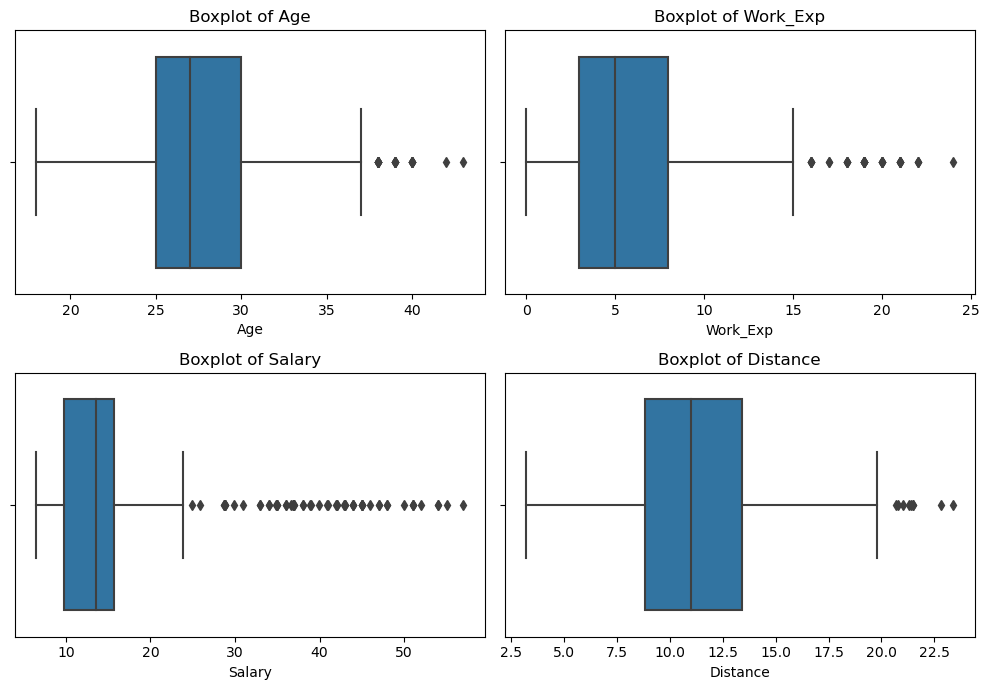

In [29]:
plt.figure(figsize = (10,7))
feature_list = num_1
for i in range(len(feature_list)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x = num[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

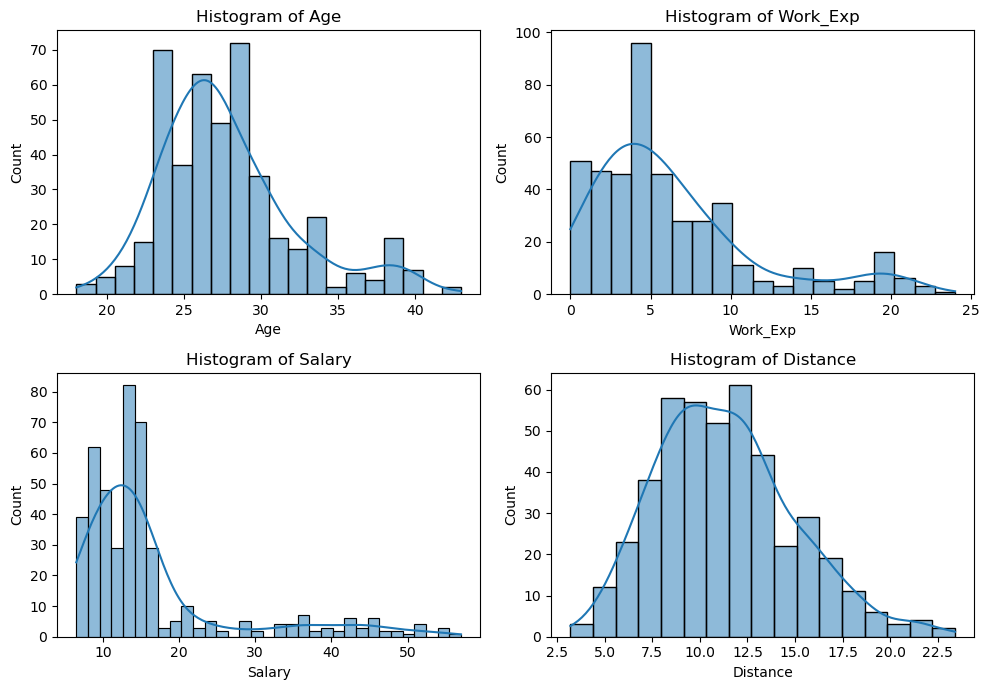

In [30]:
plt.figure(figsize = (10,7))
feature_list = num_1
for i in range(len(feature_list)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x = num[feature_list[i]], data = df,kde=True)
    plt.title('Histogram of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: xlabel='Engineer', ylabel='count'>

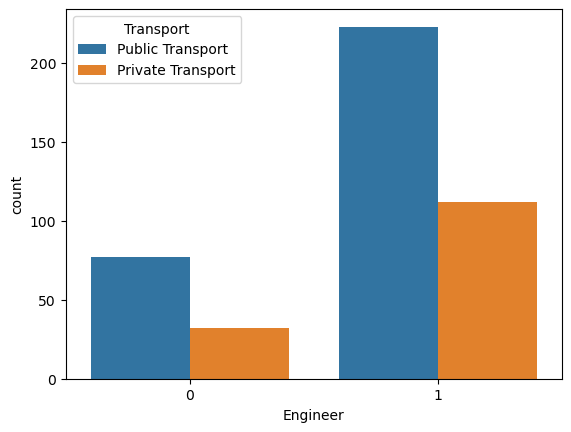

In [31]:
sns.countplot(x='Engineer',data=df,hue='Transport')

<Axes: xlabel='MBA', ylabel='count'>

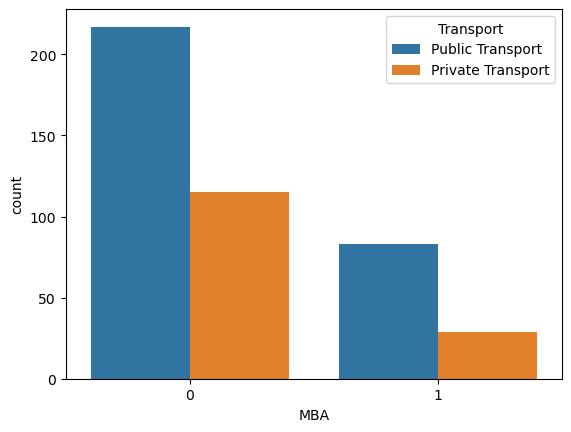

In [32]:
sns.countplot(x='MBA',data=df,hue='Transport')

<Axes: xlabel='license', ylabel='count'>

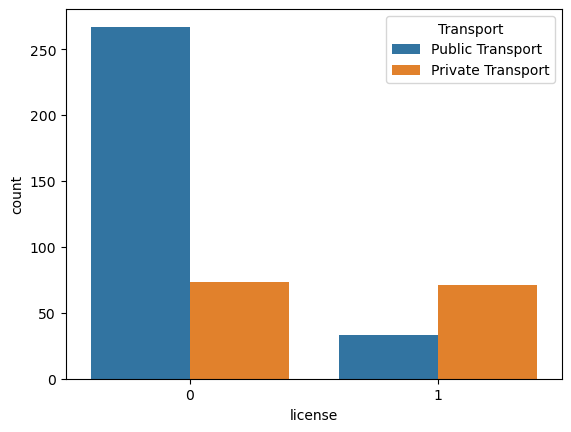

In [33]:
sns.countplot(x='license',data=df,hue='Transport')

<Axes: xlabel='Gender', ylabel='count'>

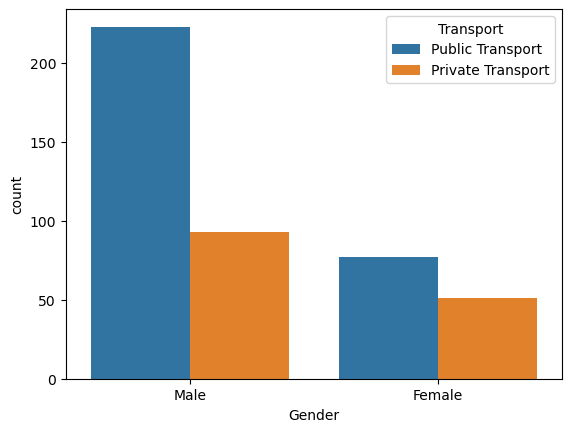

In [34]:
sns.countplot(x='Gender',data=df,hue='Transport')

In [35]:
df.skew()

Age         0.955276
Engineer   -1.186708
MBA         1.144763
Work_Exp    1.352840
Salary      2.044533
Distance    0.539851
license     1.259293
dtype: float64

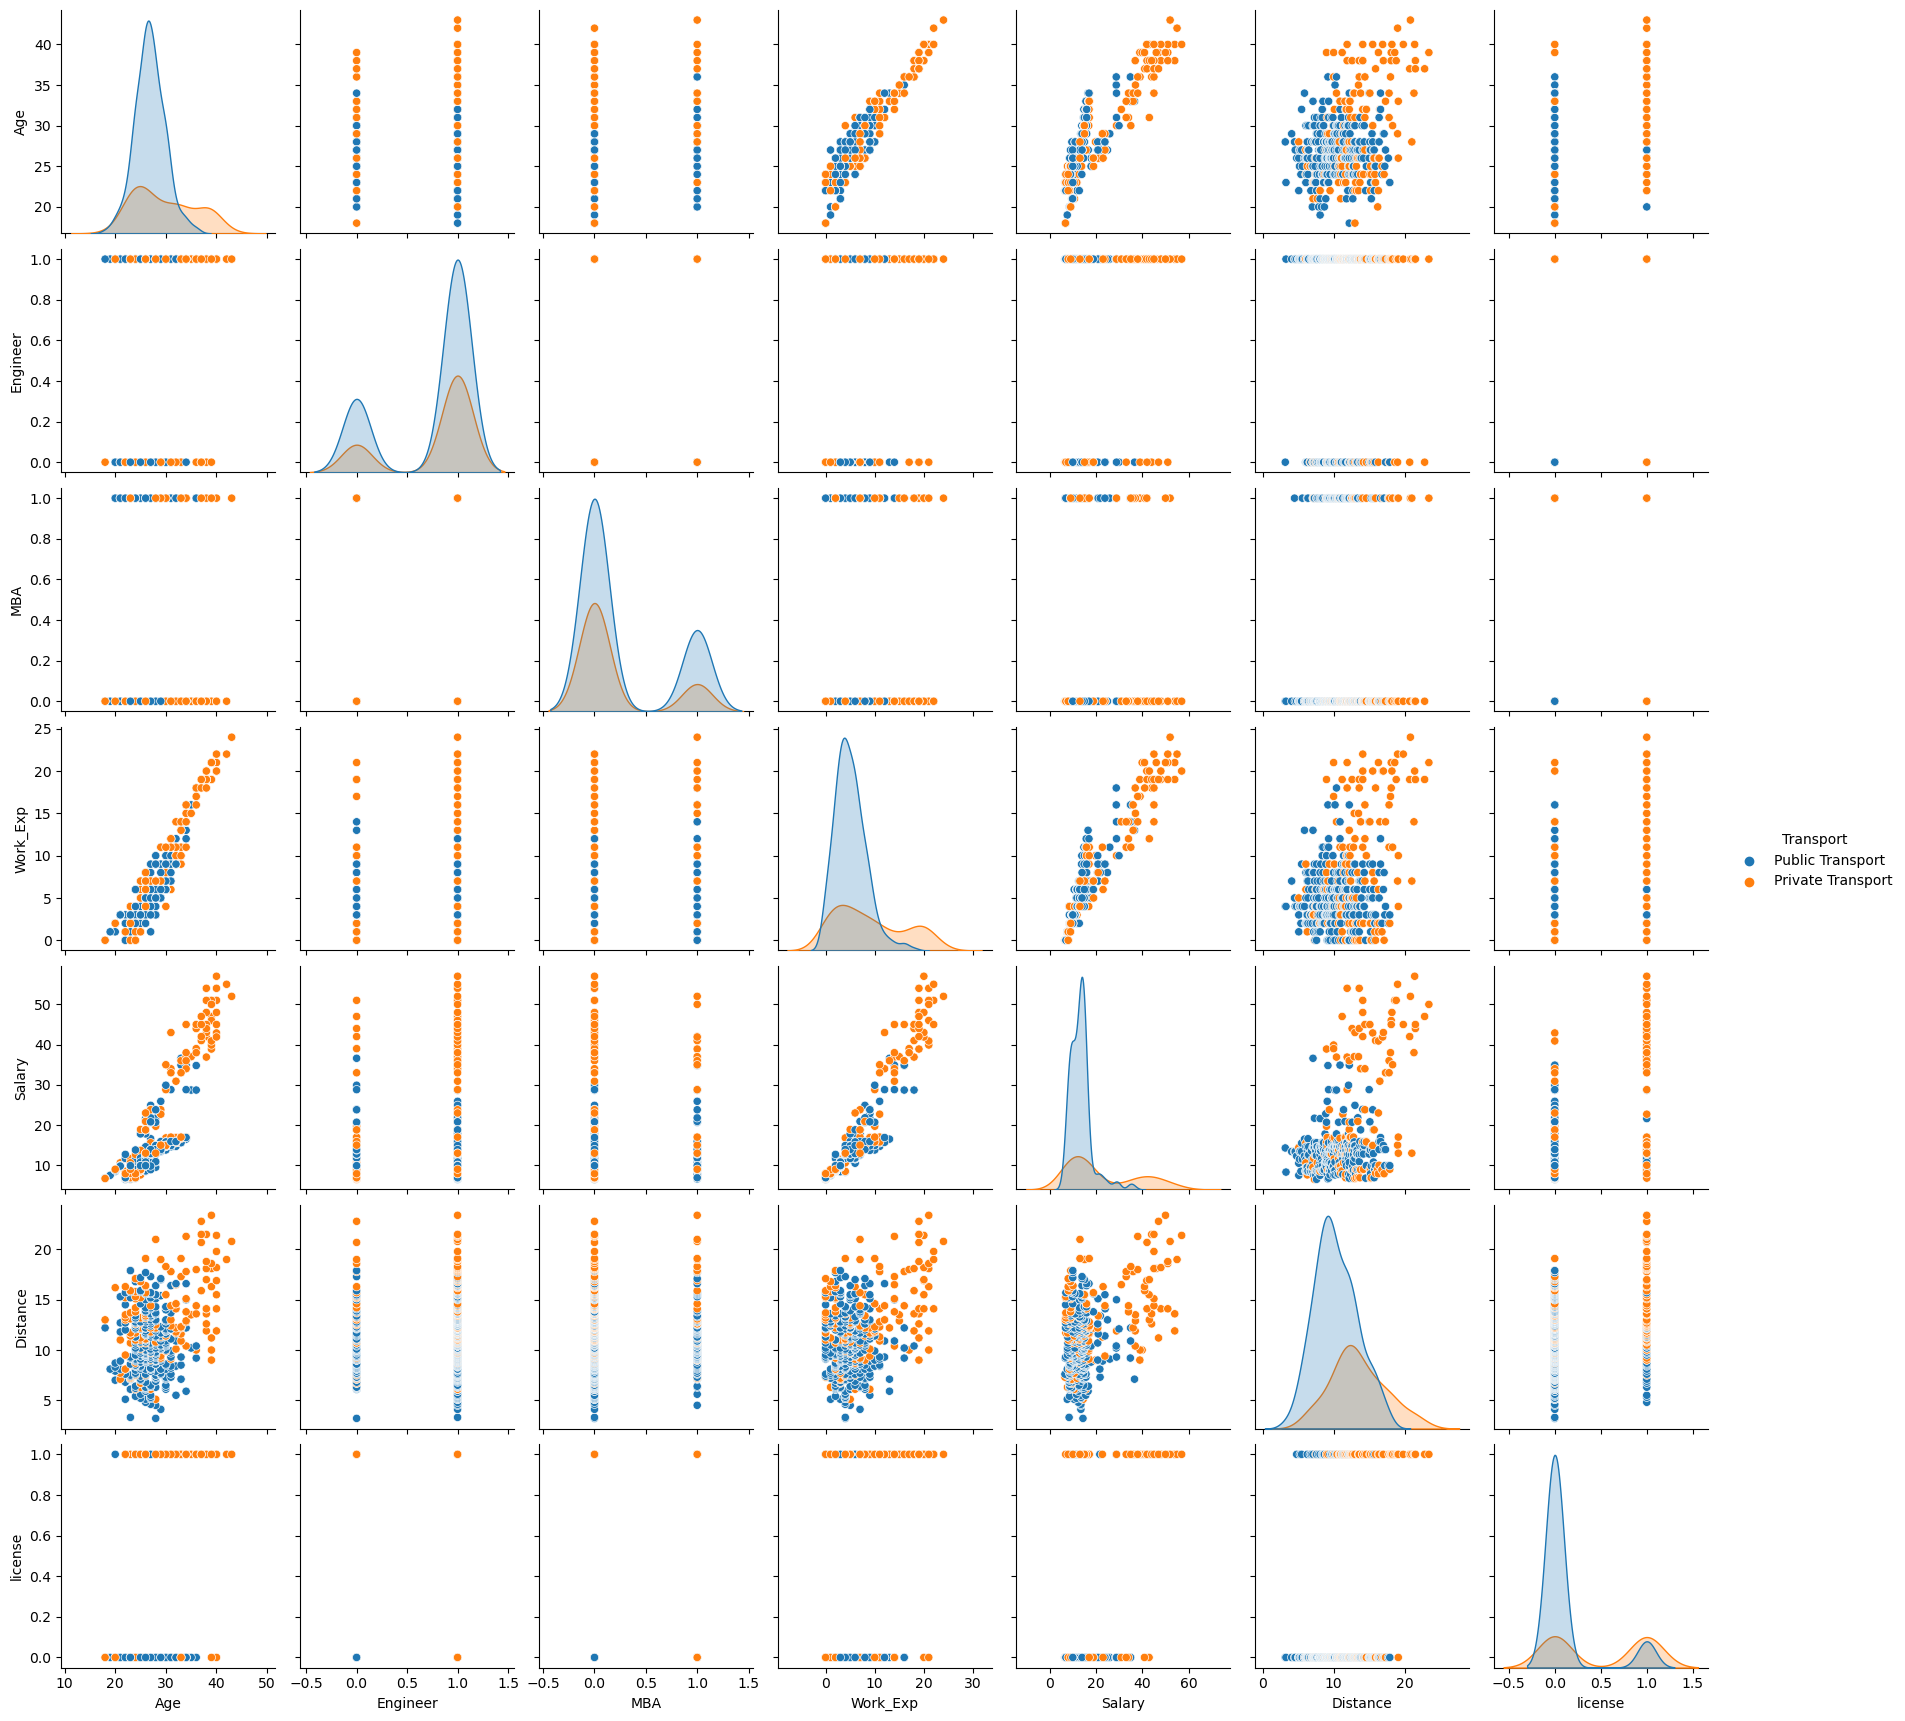

In [36]:
sns.pairplot(data=df,hue='Transport')

<Axes: >

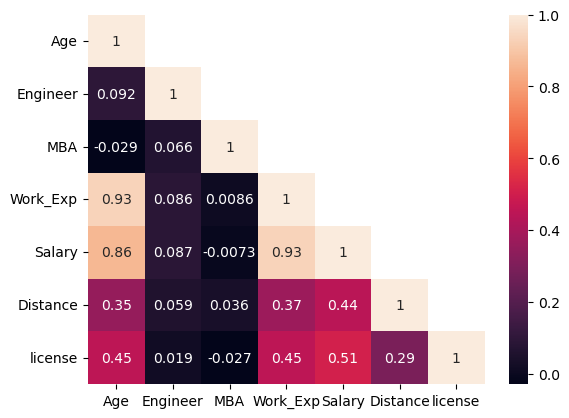

In [37]:
sns.heatmap(data = df.corr(),annot=True,mask =np.triu(df.corr(),1))

### Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts). 

In [38]:
df = pd.get_dummies(data = df, columns = ['Gender','Transport'],drop_first=True)

In [39]:
df.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male,Transport_Public Transport
0,28,0,0,4,14.3,3.2,0,1,1
1,23,1,0,4,8.3,3.3,0,0,1
2,29,1,0,7,13.4,4.1,0,1,1
3,28,1,1,5,13.4,4.5,0,0,1
4,27,1,0,4,13.4,4.6,0,1,1


In [40]:
df = df.rename({'Transport_Public Transport' : 'Transport_Public_Transport'},axis='columns')

In [41]:
# Scailing is not required for some cases

In [42]:
X = df.drop(['Transport_Public_Transport'],axis=1)
y = df['Transport_Public_Transport']

### Split data into training and test set 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [45]:
X_train.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male
201,29,0,0,5,15.9,10.5,0,1
386,27,1,1,6,12.9,15.6,0,1
329,27,1,0,6,12.9,13.3,0,1
249,23,1,0,0,6.9,11.7,0,1
349,30,1,0,7,14.9,14.0,0,1


In [46]:
print('There are ',len(X_train),'rows of data in train_set')

There are  310 rows of data in train_set


In [47]:
print('There are ',len(X_test),'rows of data in train_set')

There are  134 rows of data in train_set


In [48]:
# We will create a seperate train test dataset for logit model building

In [49]:
X_train_log = X_train.copy()

In [50]:
X_test_log = X_test.copy()

In [51]:
y_train_log = y_train.copy()

In [52]:
y_test_log = y_test.copy()

In [53]:
X_train_log.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male
201,29,0,0,5,15.9,10.5,0,1
386,27,1,1,6,12.9,15.6,0,1
329,27,1,0,6,12.9,13.3,0,1
249,23,1,0,0,6.9,11.7,0,1
349,30,1,0,7,14.9,14.0,0,1


In [54]:
X_test_log.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male
247,26,1,0,8,14.6,11.6,0,0
179,27,0,1,5,13.9,10.0,0,1
186,35,1,0,16,28.7,10.2,0,0
31,24,1,1,2,8.6,6.4,0,1
218,33,1,0,11,16.7,10.9,1,1


##  Logistic regression

In [55]:
df.corr()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male,Transport_Public_Transport
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311,0.098855,-0.305710
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924,0.018214,-0.037465
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358,0.094890,0.081139
Work_Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867,0.086022,-0.362624
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095,0.096262,-0.423261
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084,0.054206,-0.403991
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000,0.234594,-0.423397
Gender_Male,0.098855,0.018214,0.094890,0.086022,0.096262,0.054206,0.234594,1.000000,0.100762
Transport_Public_Transport,-0.305710,-0.037465,0.081139,-0.362624,-0.423261,-0.403991,-0.423397,0.100762,1.000000


In [56]:
from sklearn.linear_model import LogisticRegression

#### Log-Reg base model with default params 

In [57]:
LR = LogisticRegression()

In [58]:
log_base_model = LR.fit(X_train_log,y_train_log)

In [59]:
log_base_model.intercept_

array([-2.17671219])

In [60]:
log_base_model.coef_

array([[ 0.26711503, -0.28302822,  0.3672301 , -0.15968492, -0.06568729,
        -0.22325126, -1.88535722,  1.09452195]])

In [61]:
#Base model test and train data classification report 
from sklearn.metrics import classification_report
y_pred_base_model_test = LR.predict(X_test_log)

y_pred_base_model_train = LR.predict(X_train_log)

print('CLASSIFICATION REPORT FOR BASE MODEL TEST DATA \n')
print(classification_report(y_test_log, y_pred_base_model_test))
print('CLASSIFICATION REPORT FOR BASE MODEL TRAIN DATA \n')
print(classification_report(y_train_log, y_pred_base_model_train))

CLASSIFICATION REPORT FOR BASE MODEL TEST DATA 

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        42
           1       0.82      0.89      0.85        92

    accuracy                           0.79       134
   macro avg       0.76      0.73      0.74       134
weighted avg       0.78      0.79      0.78       134

CLASSIFICATION REPORT FOR BASE MODEL TRAIN DATA 

              precision    recall  f1-score   support

           0       0.77      0.54      0.64       102
           1       0.80      0.92      0.86       208

    accuracy                           0.80       310
   macro avg       0.79      0.73      0.75       310
weighted avg       0.79      0.80      0.79       310



In [62]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_log.values, i) for i in range(X_train_log.shape[1])],
    index=X_train_log.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

Age            22.264997
Engineer        4.022232
MBA             1.384646
Work_Exp       20.027645
Salary         30.250094
Distance       12.785748
license         1.910177
Gender_Male     3.531363
dtype: float64



AUC: 0.816


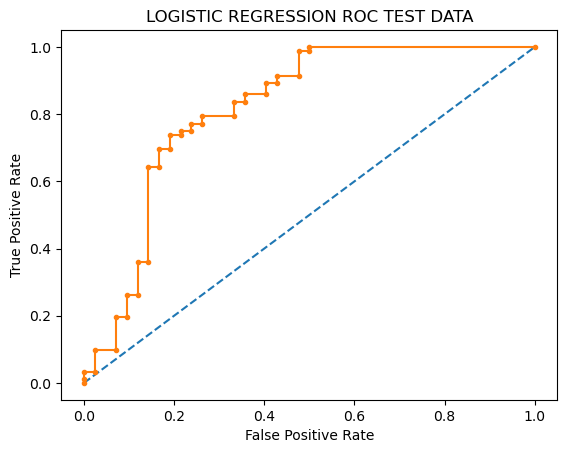

In [63]:
# predict probabilities
probs = log_base_model.predict_proba(X_test_log)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_log, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.834


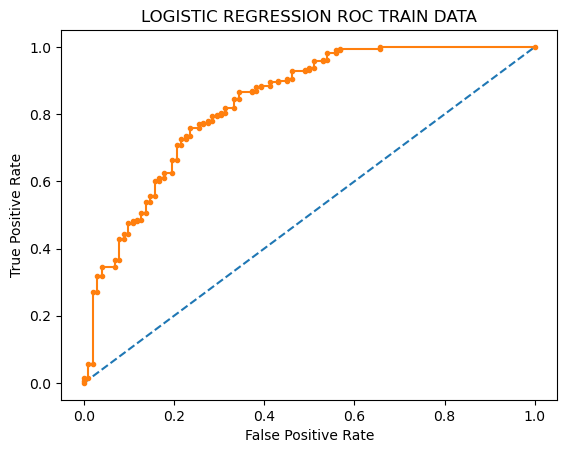

In [64]:
# predict probabilities
probs = log_base_model.predict_proba(X_train_log)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_log, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION ROC TRAIN DATA')
# show the plot
plt.show()

#### Log-Reg model with hyper params 

In [65]:
#Grid search CV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1', 'l2', 'elasticnet','none'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

In [68]:
grid_search = GridSearchCV(estimator = log_base_model, param_grid = param_grid, cv = 15)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [69]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [70]:
log_best_model = grid_search.best_estimator_

In [71]:
log_best_model.intercept_

array([-0.40457013])

In [72]:
log_best_model.coef_

array([[ 0.19422328, -0.29567806,  0.33719647, -0.09015534, -0.07355176,
        -0.22727713, -1.82835552,  1.07870214]])

In [73]:
import statsmodels.formula.api as sm

In [74]:
log_best_model = grid_search.best_estimator_

In [75]:
#Base model test and train data classification report 
from sklearn.metrics import classification_report
y_pred_best_model_test = log_best_model.predict(X_test_log)

y_pred_best_model_train = log_best_model.predict(X_train_log)

print('CLASSIFICATION REPORT FOR BASE MODEL TEST DATA \n')
print(classification_report(y_test_log, y_pred_best_model_test))
print('CLASSIFICATION REPORT FOR BASE MODEL TRAIN DATA \n')
print(classification_report(y_train_log, y_pred_best_model_train))

CLASSIFICATION REPORT FOR BASE MODEL TEST DATA 

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        42
           1       0.83      0.92      0.88        92

    accuracy                           0.82       134
   macro avg       0.81      0.76      0.78       134
weighted avg       0.82      0.82      0.81       134

CLASSIFICATION REPORT FOR BASE MODEL TRAIN DATA 

              precision    recall  f1-score   support

           0       0.76      0.52      0.62       102
           1       0.80      0.92      0.85       208

    accuracy                           0.79       310
   macro avg       0.78      0.72      0.73       310
weighted avg       0.78      0.79      0.77       310



In [76]:
from sklearn import metrics

<Figure size 3000x1400 with 0 Axes>

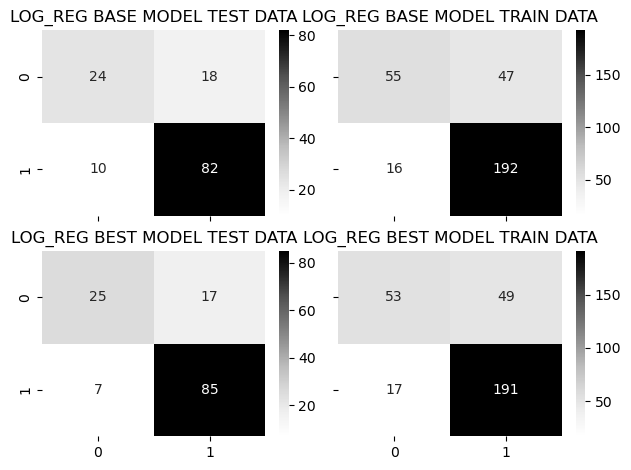

In [77]:
plt.figure(figsize=(30,14))
f,a =  plt.subplots(2,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test_log,y_pred_base_model_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LOG_REG BASE MODEL TEST DATA')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_train_log,y_pred_base_model_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LOG_REG BASE MODEL TRAIN DATA')

plot_2 = sns.heatmap((metrics.confusion_matrix(y_test_log,y_pred_best_model_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][0]);
a[1][0].set_title('LOG_REG BEST MODEL TEST DATA');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_train_log,y_pred_best_model_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][1]);
a[1][1].set_title('LOG_REG BEST MODEL TRAIN DATA');

plt.tight_layout()


AUC: 0.820


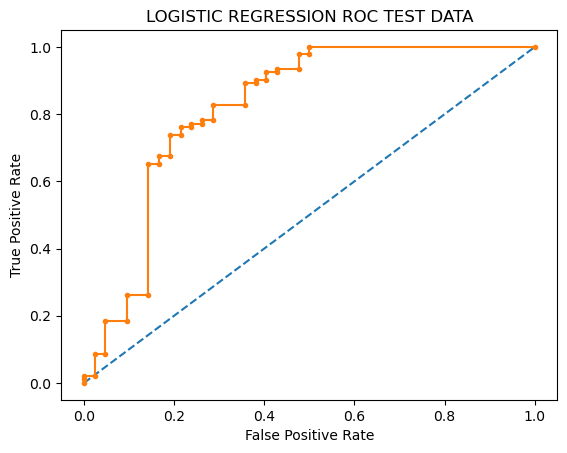

In [78]:
# predict probabilities
probs = log_best_model.predict_proba(X_test_log)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_log, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.829


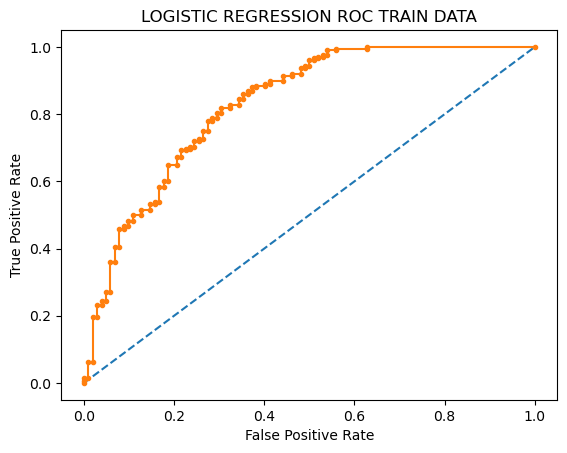

In [79]:
# predict probabilities
probs = log_best_model.predict_proba(X_train_log)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_log, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION ROC TRAIN DATA')
# show the plot
plt.show()

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

KNN_base_model=KNeighborsClassifier()
KNN_base_model.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
## Performance Matrix on train data set
y_train_predict_knn = KNN_base_model.predict(X_train)
model_score = KNN_base_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_knn))
print(metrics.classification_report(y_train, y_train_predict_knn))

0.8516129032258064
[[ 68  34]
 [ 12 196]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       102
           1       0.85      0.94      0.89       208

    accuracy                           0.85       310
   macro avg       0.85      0.80      0.82       310
weighted avg       0.85      0.85      0.85       310



In [82]:
## Performance Matrix on test data set
y_test_predict_knn = KNN_base_model.predict(X_test)
model_score = KNN_base_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_knn))
print(metrics.classification_report(y_test, y_test_predict_knn))

0.753731343283582
[[22 20]
 [13 79]]
              precision    recall  f1-score   support

           0       0.63      0.52      0.57        42
           1       0.80      0.86      0.83        92

    accuracy                           0.75       134
   macro avg       0.71      0.69      0.70       134
weighted avg       0.74      0.75      0.75       134



AUC: 0.780


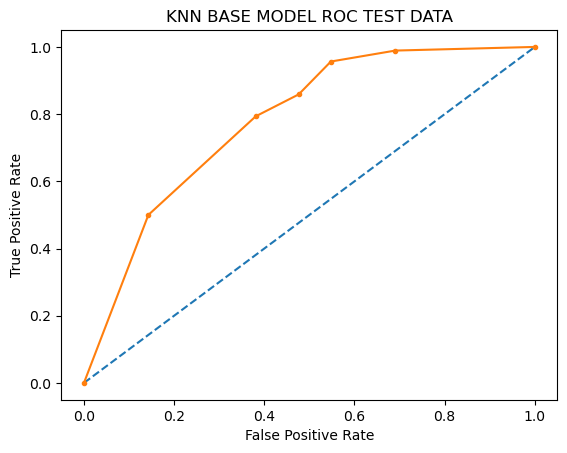

In [83]:
# predict probabilities
probs = KNN_base_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN BASE MODEL ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.929


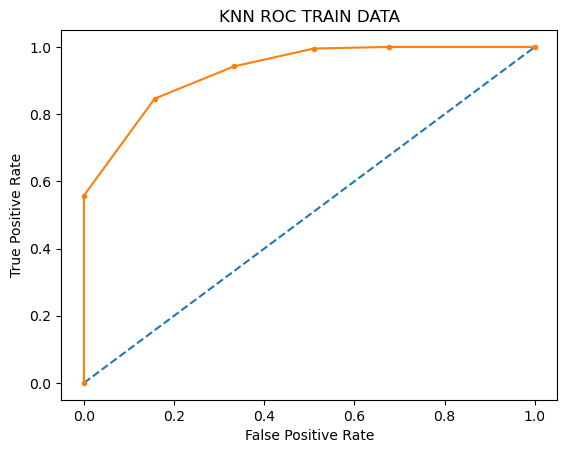

In [84]:
# predict probabilities
probs = KNN_base_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC TRAIN DATA')
# show the plot
plt.show()

#### Appyling KNN with scaled data 

In [85]:
df_copy = df.copy()

In [86]:
df_copy.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male,Transport_Public_Transport
0,28,0,0,4,14.3,3.2,0,1,1
1,23,1,0,4,8.3,3.3,0,0,1
2,29,1,0,7,13.4,4.1,0,1,1
3,28,1,1,5,13.4,4.5,0,0,1
4,27,1,0,4,13.4,4.6,0,1,1


In [87]:
from scipy.stats import zscore

In [88]:
df_copy[['Work_Exp','Salary','Distance','Age']] = df_copy[['Work_Exp','Salary','Distance','Age']].apply(zscore)

In [89]:
df_copy

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male,Transport_Public_Transport
0,0.057178,0,0,-0.450332,-0.185666,-2.255137,0,1,1
1,-1.076164,1,0,-0.450332,-0.760265,-2.227375,0,0,1
2,0.283846,1,0,0.137173,-0.271856,-2.005282,0,1,1
3,0.057178,1,1,-0.254497,-0.271856,-1.894235,0,0,1
4,-0.169491,1,0,-0.450332,-0.271856,-1.866473,0,1,1
...,...,...,...,...,...,...,...,...,...
439,2.777197,1,0,2.683029,3.903560,2.797490,1,1,0
440,2.323860,1,0,2.487194,2.658597,2.825252,1,1,0
441,2.097192,1,0,2.487194,2.754363,2.825252,1,1,0
442,2.097192,0,0,2.487194,2.945896,3.186154,1,1,0


In [90]:
X_knn = df_copy.drop(['Transport_Public_Transport'],axis=1)
y_knn = df_copy['Transport_Public_Transport']

In [91]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.30, random_state=1)

In [92]:
X_train_knn

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male
201,0.283846,0,0,-0.254497,-0.032440,-0.228534,0,1
386,-0.169491,1,1,-0.058662,-0.319739,1.187312,0,1
329,-0.169491,1,0,-0.058662,-0.319739,0.548794,0,1
249,-1.076164,1,0,-1.233673,-0.894338,0.104607,0,1
349,0.510514,1,0,0.137173,-0.128206,0.743125,0,1
...,...,...,...,...,...,...,...,...
255,0.283846,0,0,0.137173,-0.252703,0.104607,0,0
72,0.283846,0,0,0.137173,-0.156936,-1.005861,0,0
396,-0.622827,0,0,-0.646168,-0.607038,1.270598,0,1
235,-0.849495,1,1,-1.233673,-0.817725,-0.006440,1,1


In [93]:
KNN_base_model_scaled=KNeighborsClassifier()
KNN_base_model_scaled.fit(X_train_knn,y_train_knn)

KNeighborsClassifier()

In [94]:
## Performance Matrix on train data set
y_train_predict_knn_scaled = KNN_base_model.predict(X_train_knn)
model_score = KNN_base_model.score(X_train_knn, y_train_knn)
print(model_score)
print(metrics.confusion_matrix(y_train_knn, y_train_predict_knn_scaled))
print(metrics.classification_report(y_train_knn, y_train_predict_knn_scaled))

0.6709677419354839
[[  0 102]
 [  0 208]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.67      1.00      0.80       208

    accuracy                           0.67       310
   macro avg       0.34      0.50      0.40       310
weighted avg       0.45      0.67      0.54       310



In [95]:
## Performance Matrix on test data set
y_test_predict_knn_scaled = KNN_base_model.predict(X_test_knn)
model_score = KNN_base_model.score(X_test_knn, y_test_knn)
print(model_score)
print(metrics.confusion_matrix(y_test_knn, y_test_predict_knn_scaled))
print(metrics.classification_report(y_test_knn, y_test_predict_knn_scaled))

0.6865671641791045
[[ 0 42]
 [ 0 92]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.69      1.00      0.81        92

    accuracy                           0.69       134
   macro avg       0.34      0.50      0.41       134
weighted avg       0.47      0.69      0.56       134



In [96]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'metric': ['euclidean','minkowski','mahalanobis','cityblock'],
    'n_jobs' : [-1],
    'p' : [1,2,3]
}

In [97]:
grid_search_knn = GridSearchCV(estimator = KNN_base_model_scaled, param_grid = param_grid_knn, cv = 10)
grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 50],
                         'metric': ['euclidean', 'minkowski', 'mahalanobis',
                                    'cityblock'],
                         'n_jobs': [-1], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [98]:
grid_search_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [99]:
KNN_best_model = grid_search_knn.best_estimator_

In [100]:
KNN_best_model.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=9, p=1,
                     weights='distance')

In [101]:
## Performance Matrix on train data set
y_train_predict_knn_scaled = KNN_best_model.predict(X_train_knn)
model_score = KNN_best_model.score(X_train_knn, y_train_knn)
print(model_score)
print(metrics.confusion_matrix(y_train_knn, y_train_predict_knn_scaled))
print(metrics.classification_report(y_train_knn, y_train_predict_knn_scaled))

1.0
[[102   0]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [102]:
## Performance Matrix on test data set
y_test_predict_knn_scaled = KNN_best_model.predict(X_test_knn)
model_score = KNN_best_model.score(X_test_knn, y_test_knn)
print(model_score)
print(metrics.confusion_matrix(y_test_knn, y_test_predict_knn_scaled))
print(metrics.classification_report(y_test_knn, y_test_predict_knn_scaled))

0.7985074626865671
[[21 21]
 [ 6 86]]
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        42
           1       0.80      0.93      0.86        92

    accuracy                           0.80       134
   macro avg       0.79      0.72      0.74       134
weighted avg       0.80      0.80      0.78       134



AUC: 0.792


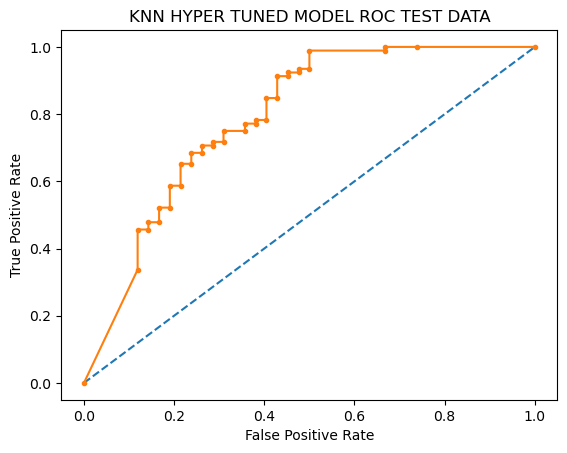

In [103]:
# predict probabilities
probs = KNN_best_model.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN HYPER TUNED MODEL ROC TEST DATA')
# show the plot
plt.show()

AUC: 1.000


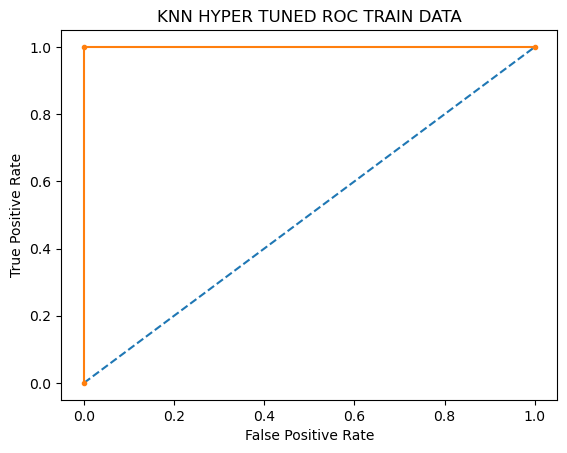

In [104]:
# predict probabilities
probs = KNN_best_model.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN HYPER TUNED ROC TRAIN DATA')
# show the plot
plt.show()

## Bagging

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
from sklearn.ensemble import BaggingClassifier
RF = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,random_state=1)
Bagging_model.fit(X_train_knn, y_train_knn)

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=1)

In [107]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train_knn)
model_score =Bagging_model.score(X_train_knn, y_train_knn)
print(model_score)
print(metrics.confusion_matrix(y_train_knn, y_train_predict))
print(metrics.classification_report(y_train_knn, y_train_predict))

0.967741935483871
[[ 92  10]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       102
           1       0.95      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.98      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



In [108]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test_knn)
model_score = Bagging_model.score(X_test_knn, y_test_knn)
print(model_score)
print(metrics.confusion_matrix(y_test_knn, y_test_predict))
print(metrics.classification_report(y_test_knn, y_test_predict))

0.7835820895522388
[[23 19]
 [10 82]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61        42
           1       0.81      0.89      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.72      0.73       134
weighted avg       0.78      0.78      0.78       134



AUC: 0.822


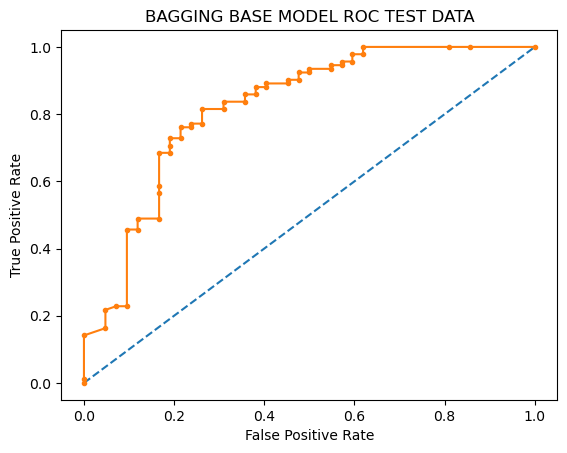

In [109]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BAGGING BASE MODEL ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.999


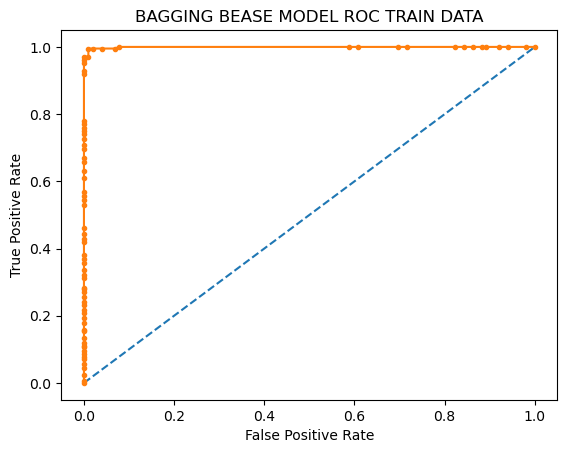

In [110]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BAGGING BEASE MODEL ROC TRAIN DATA')
# show the plot
plt.show()

### Hyper param tuning 

In [111]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_features' :[0,1],
}

In [112]:
grid_search_bag = GridSearchCV(estimator = Bagging_model, param_grid = param_grid, cv = 5)
grid_search_bag.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         random_state=1),
             param_grid={'max_features': [0, 1], 'n_estimators': [10, 50, 100]})

In [113]:
grid_search_bag.best_params_

{'max_features': 1, 'n_estimators': 50}

In [114]:
best_model_bag = grid_search_bag.best_estimator_

In [115]:
## Performance Matrix on train data set
y_train_predict_bag = grid_search_bag.predict(X_train_knn)
model_score = grid_search_bag.score(X_train_knn, y_train_knn)
print(model_score)
print(metrics.confusion_matrix(y_train_knn, y_train_predict_bag))
print(metrics.classification_report(y_train_knn, y_train_predict_bag))

0.8225806451612904
[[ 47  55]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       102
           1       0.79      1.00      0.88       208

    accuracy                           0.82       310
   macro avg       0.90      0.73      0.76       310
weighted avg       0.86      0.82      0.80       310



In [116]:
## Performance Matrix on test data set
y_test_predict_bag = grid_search_bag.predict(X_test_knn)
model_score = grid_search_bag.score(X_test_knn, y_test_knn)
print(model_score)
print(metrics.confusion_matrix(y_test_knn, y_test_predict_bag))
print(metrics.classification_report(y_test_knn, y_test_predict_bag))

0.7985074626865671
[[15 27]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        42
           1       0.77      1.00      0.87        92

    accuracy                           0.80       134
   macro avg       0.89      0.68      0.70       134
weighted avg       0.84      0.80      0.76       134



AUC: 0.752


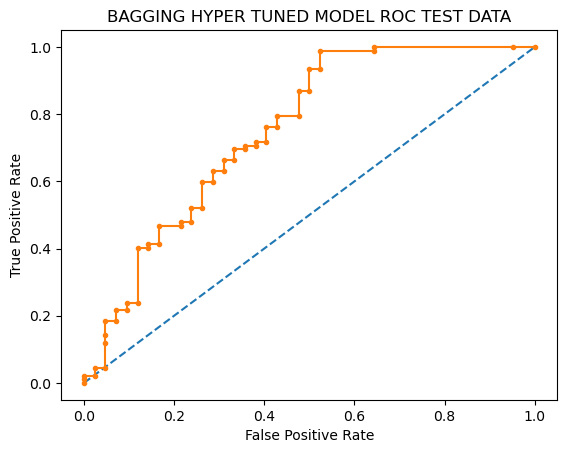

In [117]:
# predict probabilities
probs = grid_search_bag.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BAGGING HYPER TUNED MODEL ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.944


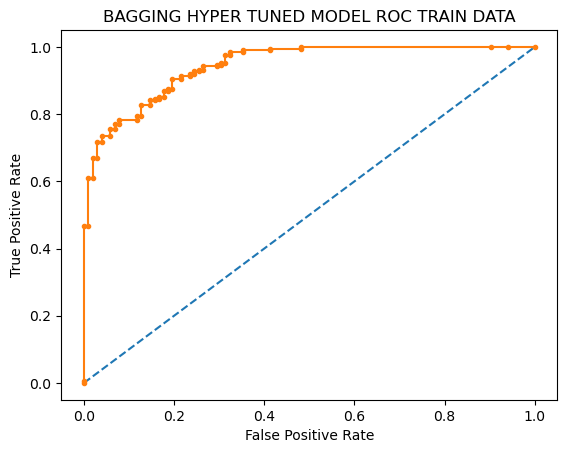

In [118]:
# predict probabilities
probs = grid_search_bag.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BAGGING HYPER TUNED MODEL ROC TRAIN DATA')
# show the plot
plt.show()

### Ada Boost 

In [119]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier()
ADB_model.fit(X_train_knn,y_train_knn)

AdaBoostClassifier()

In [120]:
## Performance Matrix on train data set
y_train_predict_ada = ADB_model.predict(X_train_knn)
model_score = ADB_model.score(X_train_knn, y_train_knn)
print(model_score)
print(metrics.confusion_matrix(y_train_knn, y_train_predict_ada))
print(metrics.classification_report(y_train_knn, y_train_predict_ada))

0.8774193548387097
[[ 76  26]
 [ 12 196]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.88      0.94      0.91       208

    accuracy                           0.88       310
   macro avg       0.87      0.84      0.86       310
weighted avg       0.88      0.88      0.87       310



In [121]:
## Performance Matrix on test data set
y_test_predict_ada = ADB_model.predict(X_test_knn)
model_score = ADB_model.score(X_test_knn, y_test_knn)
print(model_score)
print(metrics.confusion_matrix(y_test_knn, y_test_predict_ada))
print(metrics.classification_report(y_test_knn, y_test_predict_ada))

0.8059701492537313
[[28 14]
 [12 80]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        42
           1       0.85      0.87      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.80      0.81      0.80       134



AUC: 0.809


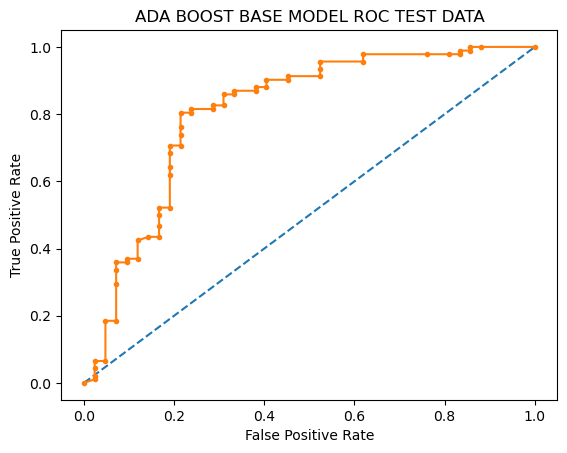

In [122]:
# predict probabilities
probs = ADB_model.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADA BOOST BASE MODEL ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.940


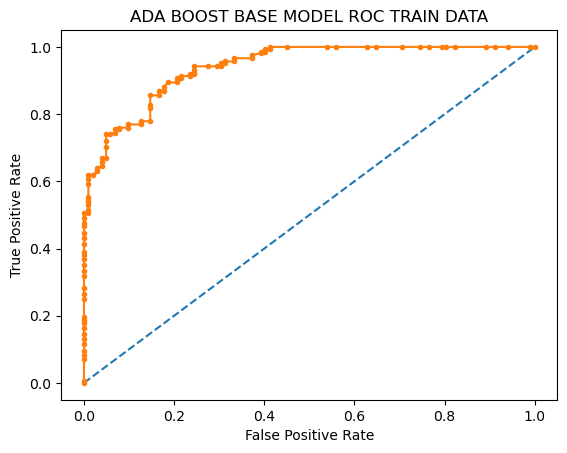

In [123]:
# predict probabilities
probs = ADB_model.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADA BOOST BASE MODEL ROC TRAIN DATA')
# show the plot
plt.show()

In [124]:
# Hyper params

In [125]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [126]:
grid_search_ada = GridSearchCV(estimator = ADB_model, param_grid = param_grid, cv = 5)
grid_search_ada.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [127]:
grid_search_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [128]:
best_model_ada = grid_search_ada.best_estimator_

In [129]:
## Performance Matrix on train data set
y_train_predict_ada = best_model_ada.predict(X_train_knn)
model_score = best_model_ada.score(X_train_knn, y_train_knn)
print(model_score)
print(metrics.confusion_matrix(y_train_knn, y_train_predict_ada))
print(metrics.classification_report(y_train_knn, y_train_predict_ada))

0.832258064516129
[[ 58  44]
 [  8 200]]
              precision    recall  f1-score   support

           0       0.88      0.57      0.69       102
           1       0.82      0.96      0.88       208

    accuracy                           0.83       310
   macro avg       0.85      0.77      0.79       310
weighted avg       0.84      0.83      0.82       310



In [130]:
## Performance Matrix on test data set
y_test_predict_ada = best_model_ada.predict(X_test_knn)
model_score = best_model_ada.score(X_test_knn, y_test_knn)
print(model_score)
print(metrics.confusion_matrix(y_test_knn, y_test_predict_ada))
print(metrics.classification_report(y_test_knn, y_test_predict_ada))

0.8283582089552238
[[23 19]
 [ 4 88]]
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        42
           1       0.82      0.96      0.88        92

    accuracy                           0.83       134
   macro avg       0.84      0.75      0.78       134
weighted avg       0.83      0.83      0.82       134



AUC: 0.825


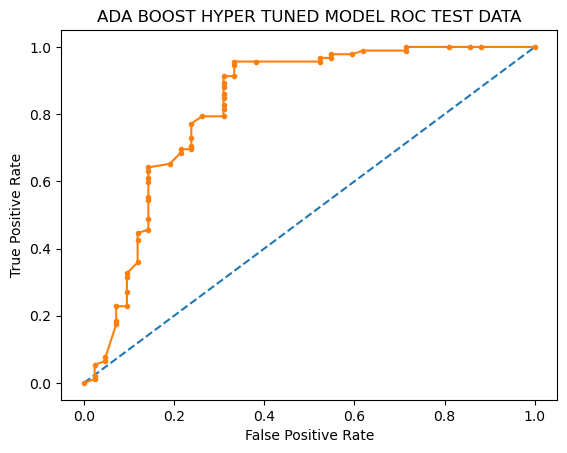

In [131]:
# predict probabilities
probs = best_model_ada.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADA BOOST HYPER TUNED MODEL ROC TEST DATA')
# show the plot
plt.show()

AUC: 0.904


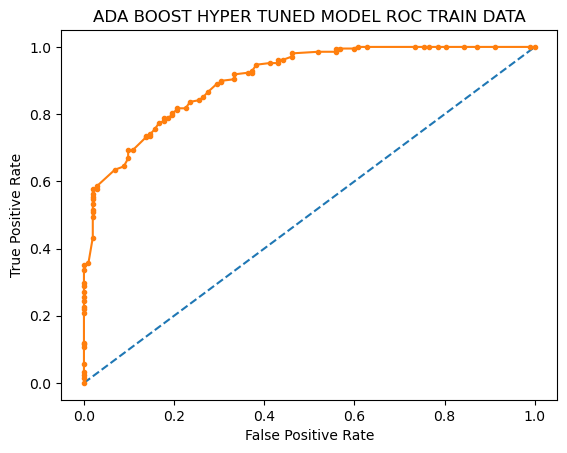

In [132]:
# predict probabilities
probs = best_model_ada.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADA BOOST HYPER TUNED MODEL ROC TRAIN DATA')
# show the plot
plt.show()